# Example

This is an end-to-end example of learning from a real-world dataset. The dataset is from a study conducted at George Mason University during the summer of 2021 on patients who were tested for COVID-19. There are 4 types of variables in this dataset.

- Demographics
- Indicators to ignore categories of symptoms
- Test result
- Symptoms

## Step 1. Load data

In [1]:
import pandas as pd

df = pd.read_csv('../../data/gmu-covid.csv')

## Step 2. Load meta information

In [2]:
import json

with open('../../data/gmu-covid.json', 'r') as f:
    meta = json.load(f)

This meta information specified the `partial` ordering of the variables as follows. Notice the sequence: demographics, indicators, test result and then symptoms.

In [3]:
print(json.dumps(meta, indent=2))

{
  "ordering": [
    [
      "RaceWhite",
      "GenderFemale",
      "Age30orMore"
    ],
    [
      "IgnoreRespSymp",
      "IgnoreGastroSymp",
      "IgnoreNeuroSymp",
      "IgnoreInflamSymp"
    ],
    [
      "TestPositive"
    ],
    [
      "Cough"
    ],
    [
      "Runnynose"
    ],
    [
      "Sorethroat"
    ],
    [
      "Headaches"
    ],
    [
      "Fatigue"
    ],
    [
      "MuscleAches"
    ],
    [
      "Chills"
    ],
    [
      "Diarrhea"
    ],
    [
      "Difficultybreathing"
    ],
    [
      "LossAppetite"
    ],
    [
      "Chestpain"
    ],
    [
      "ExcessSweat"
    ],
    [
      "Shortnessofbreath",
      "Vomiting"
    ],
    [
      "AbdominalPain"
    ],
    [
      "JointPain"
    ],
    [
      "LossTaste"
    ],
    [
      "LossSmell",
      "Confusion"
    ],
    [
      "LossBalance",
      "Pinkeye",
      "Shivering"
    ],
    [
      "Wheezing"
    ],
    [
      "RedRash",
      "UnexplainedRash"
    ],
    [
      "Numbness",


## Step 3. Learn structure and parameters

In [4]:
from lassobbn.learn import do_learn

json_data = do_learn(df, meta, threshold=0.5)

If you want to inspect the Lasso regression models for each variable, use the `get_model_params(...)` method. This method will return a dataframe where each row corresponds to a variable and its regression model.

In [5]:
from lassobbn.learn import get_model_params

model_params = get_model_params(df, meta['ordering'])
model_params

,child,intercept,RaceWhite,GenderFemale,Age30orMore,IgnoreRespSymp,IgnoreGastroSymp,IgnoreNeuroSymp,IgnoreInflamSymp,TestPositive,...,LossBalance,Pinkeye,Shivering,Wheezing,RedRash,UnexplainedRash,Numbness,SlurredSpeech,Bluish,Fever
0,IgnoreRespSymp,-1.245788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,IgnoreGastroSymp,-1.779496,-0.284584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,IgnoreNeuroSymp,-2.163174,-0.015908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,IgnoreInflamSymp,-2.530406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,TestPositive,-0.574332,0.116288,0.000000,-0.681834,0.000000,0.000000,0.195880,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,Cough,-0.142664,0.336751,-0.266911,0.000000,0.594868,0.000000,0.000000,0.166636,0.967939,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,Runnynose,-0.057901,0.294354,-0.312167,-0.314754,0.021427,0.000000,0.000000,0.000000,0.100704,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,Sorethroat,-1.306457,0.000000,0.000000,-0.555148,0.318616,0.000000,0.000000,0.000000,0.504619,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,Headaches,-0.782138,-0.425049,0.000000,-0.164176,-0.069481,0.000000,0.836251,0.000000,1.289158,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,Fatigue,-0.441133,-0.432709,-0.167590,-0.191928,-0.633604,0.000000,-0.129801,0.000000,0.379283,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Since the dataframe may be large and sparse, here's a recipe to show the regression models in text format. Notice how there are some disconnected nodes.

In [6]:
def get_formula(r, threshold=0.5):
    cols = [i for i in r.index if i not in ['child', 'intercept']]
    coefs = {v: r[v] for v in cols if abs(r[v]) > threshold}
    coefs = ' + '.join([f'{v:.2f}*{k}' for k, v in coefs.items()])
    
    if len(coefs) > 0:
        formula = f'{r.child} = {r.intercept:.2f} + {coefs}'
    else:
        formula = f'{r.child} = {r.intercept:.2f}'
    return formula

for m in model_params.apply(get_formula, axis=1).values:
    print(m)

IgnoreRespSymp = -1.25
IgnoreGastroSymp = -1.78
IgnoreNeuroSymp = -2.16
IgnoreInflamSymp = -2.53
TestPositive = -0.57 + -0.68*Age30orMore
Cough = -0.14 + 0.59*IgnoreRespSymp + 0.97*TestPositive
Runnynose = -0.06 + 1.01*Cough
Sorethroat = -1.31 + -0.56*Age30orMore + 0.50*TestPositive + 0.67*Cough + 0.94*Runnynose
Headaches = -0.78 + 0.84*IgnoreNeuroSymp + 1.29*TestPositive + 0.58*Runnynose + 0.66*Sorethroat
Fatigue = -0.44 + -0.63*IgnoreRespSymp + 0.78*Headaches
MuscleAches = -1.23 + 1.51*Fatigue
Chills = -2.53 + 0.58*TestPositive + 0.73*Sorethroat + 0.74*Fatigue + 1.12*MuscleAches
Diarrhea = -2.04 + 1.00*IgnoreGastroSymp + 0.53*Sorethroat + 0.66*Headaches
Difficultybreathing = -2.43 + 0.59*IgnoreNeuroSymp + 0.69*MuscleAches + 0.96*Chills + 1.15*Diarrhea
LossAppetite = -2.38 + 0.55*Cough + 0.87*Fatigue + 0.62*Chills + 0.53*Difficultybreathing
Chestpain = -2.69 + 0.52*TestPositive + 0.59*Fatigue + 0.88*Difficultybreathing + 0.61*LossAppetite
ExcessSweat = -2.65
Shortnessofbreath = -2.17 

We can visualize the regression coefficients as a heatmap. The rows in this heatmap corresponds to dependent variables (notice how the demographics variables are not shown since they are at the root, have no parents, and thus, did not have Lasso regressions run against them). The columns represents independent variables.

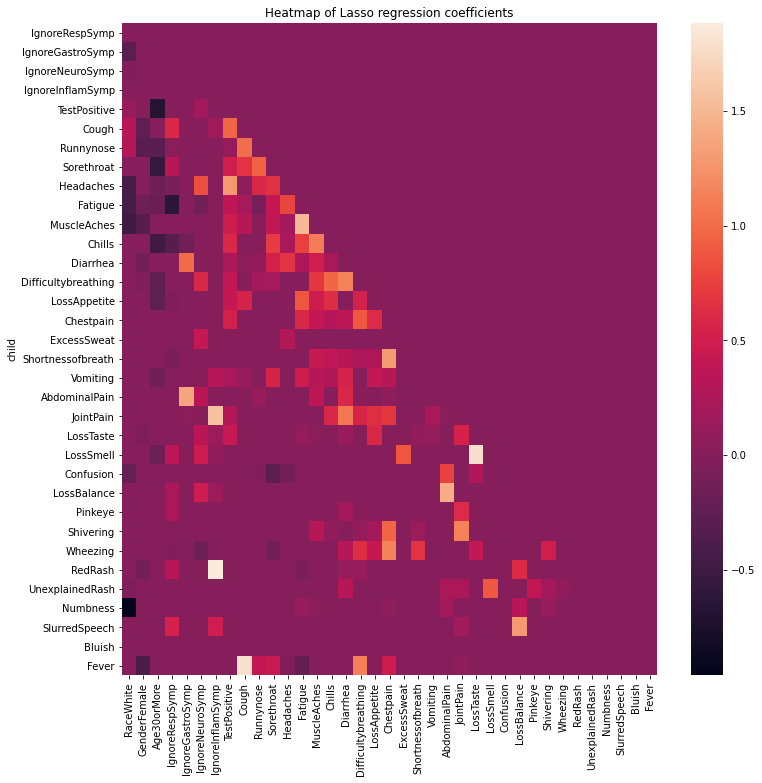

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

mp_df = model_params[[c for c in model_params if c not in ['child', 'intercept']]]
mp_df.index = model_params['child']

fig, ax = plt.subplots(figsize=(12, 12))

_ = sns.heatmap(mp_df)
_ = ax.set_title('Heatmap of Lasso regression coefficients')

Just for fun, for bivariate analysis, we can view the pairwise asymmetric correlation using [Goodman-Kruskal's Lambda](https://py-pair.readthedocs.io/deepdives.html#goodman-kruskal-s-lambda) as a heatmap. For this heatmap, the independent variable is in the rows and the dependent variable is in the columns. This heatmap (or matrix) is asymmetric. 

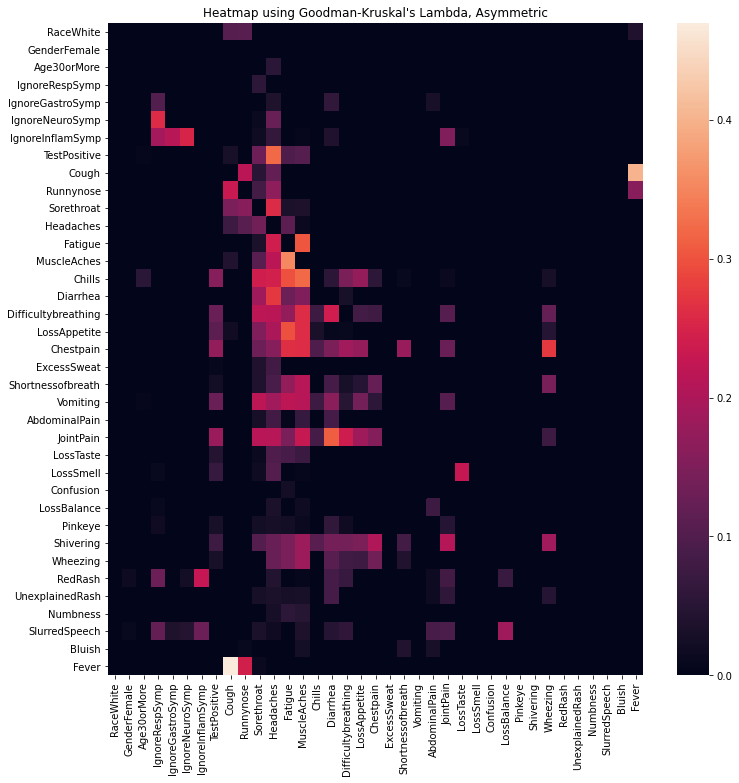

In [8]:
from pypair.association import binary_binary
import numpy as np

gkl_for = lambda a, b: binary_binary(a, b, measure='gk_lambda')
gkl_rev = lambda a, b: binary_binary(a, b, measure='gk_lambda_reversed')

gkl_df = pd.DataFrame(
    np.triu(df.corr(method=gkl_for), k=1) + np.tril(df.corr(method=gkl_rev), k=-1),
    columns=df.columns,
    index=df.columns
)

fig, ax = plt.subplots(figsize=(12, 12))

_ = sns.heatmap(gkl_df)
_ = ax.set_title('Heatmap using Goodman-Kruskal\'s Lambda, Asymmetric')

We can also view the pairwise association using the [Jaccard](https://py-pair.readthedocs.io/deepdives.html#binary-association) measure of association as a heatmap. The heatmap is symmetric.

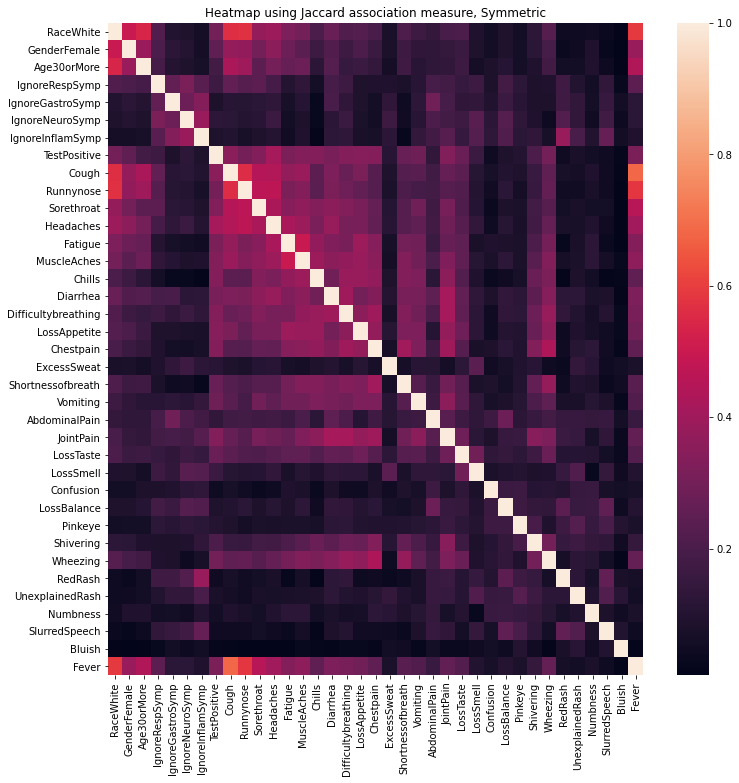

In [9]:
jaccard = lambda a, b: binary_binary(a, b, measure='jaccard')

fig, ax = plt.subplots(figsize=(12, 12))

_ = sns.heatmap(df.corr(method=jaccard))
_ = ax.set_title('Heatmap using Jaccard association measure, Symmetric')

Check out the [py-pair](https://py-pair.readthedocs.io/) API to perform more pairwise binary association measures.

## Step 4. Create BBN

The underlying inference engine is [py-bbn](https://py-bbn.readthedocs.io).

In [10]:
from lassobbn.learn import to_bbn

bbn = to_bbn(json_data)

Visualize BBN structure using [networkx](https://networkx.org/) and [dot](https://www.mankier.com/1/dot).

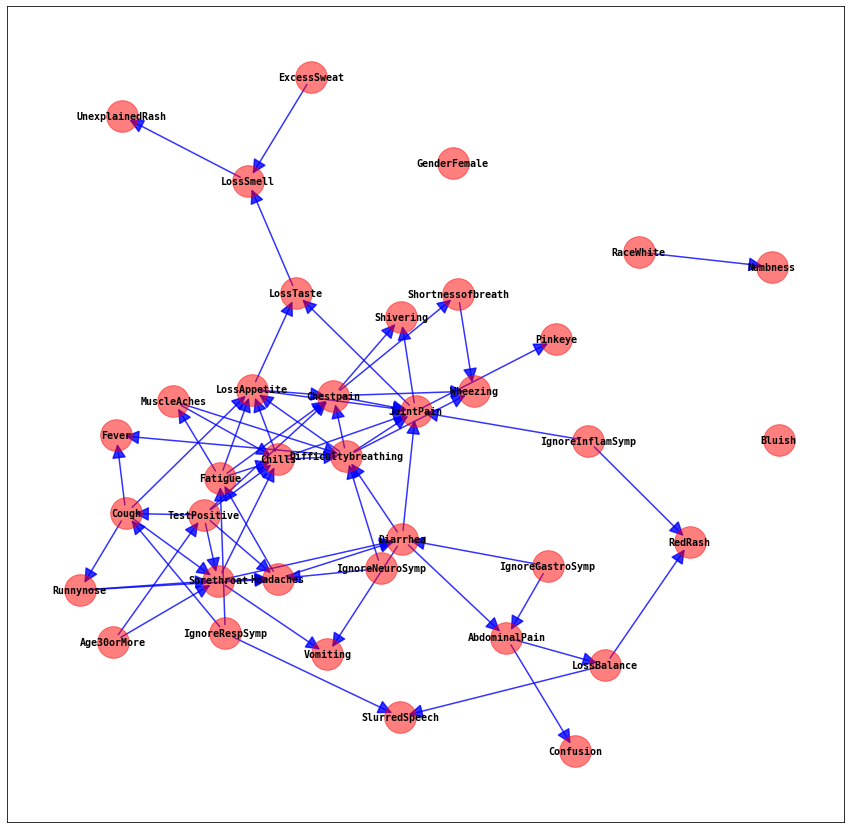

In [11]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15, 15))

g, labels = bbn.to_nx_graph()
    
pos = nx.nx_agraph.graphviz_layout(g, prog='dot', args='-Kneato')

params = {
    'node_color': 'r',
    'node_size': 1000,
    'node_shape': 'o',
    'alpha': 0.5,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)

params = {
    'labels': labels,
    'font_size': 10,
    'font_color': 'k',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)

params = {
    'width': 1.5,
    'alpha': 0.8,
    'edge_color': 'b',
    'arrowsize': 30,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)

## Step 5. Do inference

You can create a join tree from a BBN and query for the marginals.

In [12]:
from pybbn.pptc.inferencecontroller import InferenceController

join_tree = InferenceController.apply(bbn)


mdf = pd.DataFrame([{**{'name': node}, **{val: prob for val, prob in posteriors.items()}} 
                    for node, posteriors in join_tree.get_posteriors().items()])
mdf.index = mdf['name']
mdf = mdf.drop(columns=['name'])
mdf

,0,1
name,,
GenderFemale,0.420824,0.579176
Bluish,0.991323,0.008677
Numbness,0.926247,0.073753
RaceWhite,0.210412,0.789588
AbdominalPain,0.678357,0.321643
Confusion,0.881061,0.118939
JointPain,0.710871,0.289129
Pinkeye,0.903404,0.096596
LossSmell,0.842829,0.157171
